***# Project Overview: Hotel Booking Demand analysis***

This project explores a real-world dataset of hotel bookings to uncover business
insights related to customer behavior, cancellation patterns, seasonality, pricing trends etc. 
The goal is to help hotel management make smarter decisions using this data.
    
***Tools:***

- Python
- Pandas & NumPy (data manipulation)
- Seaborn & Matplotlib (visualizations)

***#Load & Preview the Dataset***

1)Data Loading 
2)Missing Values Check 
3)Data Types 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt            #import all the libraries
import seaborn as sns                    

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')          #ignore future warning message

plt.style.use('seaborn-darkgrid') 
sns.set_palette('Set2')
sns.set_context('notebook')          #set visual style

In [17]:
df = pd.read_csv("/kaggle/input/hotel-bookings-dataset/hotel_bookings.csv")  # Load the dataset

df.head() # Preview 1st 5 rows

df.info() #check basic structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df.isnull().sum().sort_values(ascending=False)

agent                             16340
country                             488
children                              4
hotel                                 0
previous_cancellations                0
reservation_status                    0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
distribution_channel                  0
is_repeated_guest                     0
is_canceled                           0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0


**#Data Cleaning – Handling Missing Values**

We found missing values in 3 columns:

- AGENT: Filled with "No Agent" assuming no booking agent was involved.
- COUNTRY: Filled with the most frequent country using mode.
- CHILDREN: Filled with 0, assuming no children if not specified.


In [21]:
df['agent'].fillna('No Agent', inplace=True)    # Handle missing values in 'agent'

most_common_country = df['country'].mode()[0]
df['country'].fillna(most_common_country, inplace=True) # Handle missing values in 'country' using mode

df['children'].fillna(0, inplace=True)# Handle missing values in 'children' by filling with 0

df.isnull().sum().sort_values(ascending=False) # Double-check if all nulls are handled


hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [22]:
df.isnull().sum().sum()  # should return 0

0

**#Questions to Explore:**

1)What’s the cancellation rate?

2)Which hotel type gets more bookings?

3)How do bookings vary by month?

4)How does lead time affect cancellations?

5)Which countries book the most?

6)Which season sees the most cancellations?

7)Do longer stays lead to higher ADR (average daily rate)?

8)What type of hotel gets more families or solo guests?


**#What’s the Cancellation Rate?**

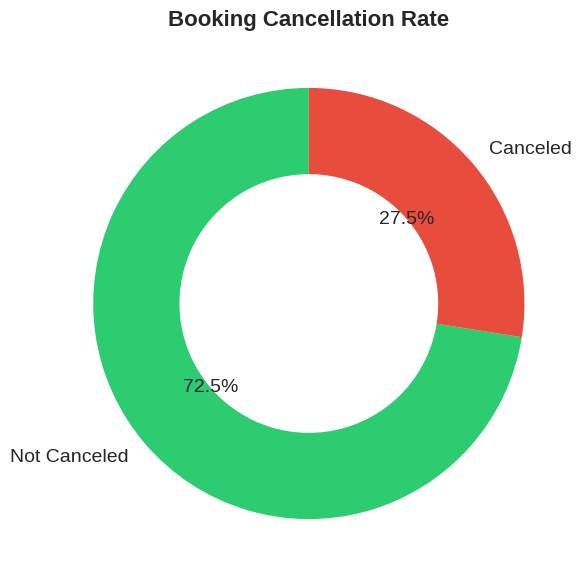

In [28]:
cancel_data = df['is_canceled'].value_counts() # Group data
labels = ['Not Canceled', 'Canceled']       # Labels
colors = ['#2ecc71', '#e74c3c']  # Green for Not Canceled, Red for Canceled     # Colors

# Plot
plt.figure(figsize=(7, 7))
plt.pie(cancel_data, labels=labels, colors=colors, startangle=90, 
        wedgeprops={'width': 0.4}, autopct='%1.1f%%', textprops={'fontsize': 14})

plt.title('Booking Cancellation Rate', fontsize=16, fontweight='bold')
plt.show()



*This donut chart gives a clear snapshot of how many bookings were canceled. High cancellation rates might suggest issues with booking policies, customer commitment, or pricing changes.

**# Which Hotel Type Gets More Bookings?**

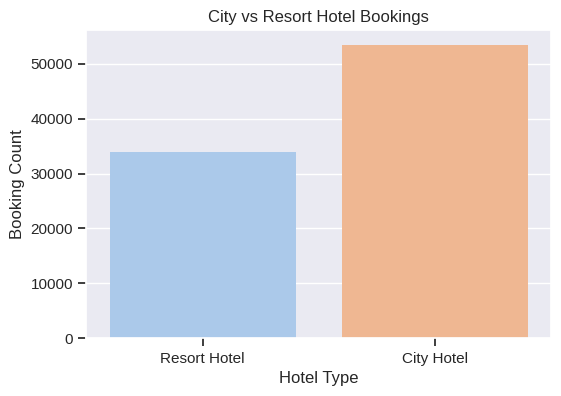

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='hotel', data=df, palette='pastel')
plt.title('City vs Resort Hotel Bookings')
plt.xlabel("Hotel Type")
plt.ylabel("Booking Count")
plt.show()


*The City Hotel receives more bookings than the Resort Hotel.  
This might be due to better location, more business travelers, or amenities in urban areas.

#**Bookings by Month (Seasonality)?**

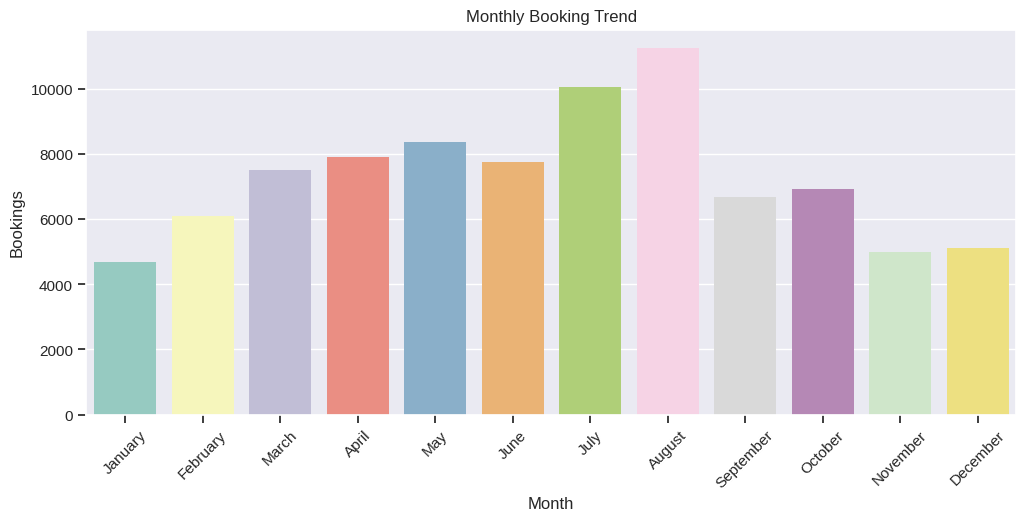

In [30]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December'] # Create a month order


plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', data=df, order=month_order, palette='Set3')
plt.title('Monthly Booking Trend')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Bookings')
plt.show()                         # Monthly booking trend


*The chart shows seasonal booking patterns.  
**July and August** are the peak months, likely due to summer holidays in Europe.  
Understanding seasonality helps hotels plan staff, inventory, and pricing.

**#Lead Time vs Cancellation?**

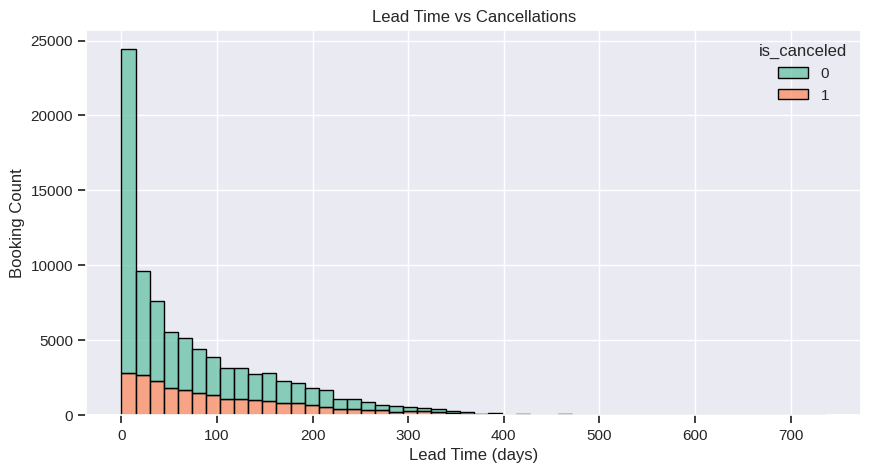

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='stack', bins=50)
plt.title('Lead Time vs Cancellations')
plt.xlabel('Lead Time (days)')
plt.ylabel('Booking Count')
plt.show()


*Guests with longer lead times are more likely to cancel.  
last-minute bookings are more committed.Hotels could use this insight to design pricing or cancellation policies.

**#Top 10 Countries by Booking Volume?**

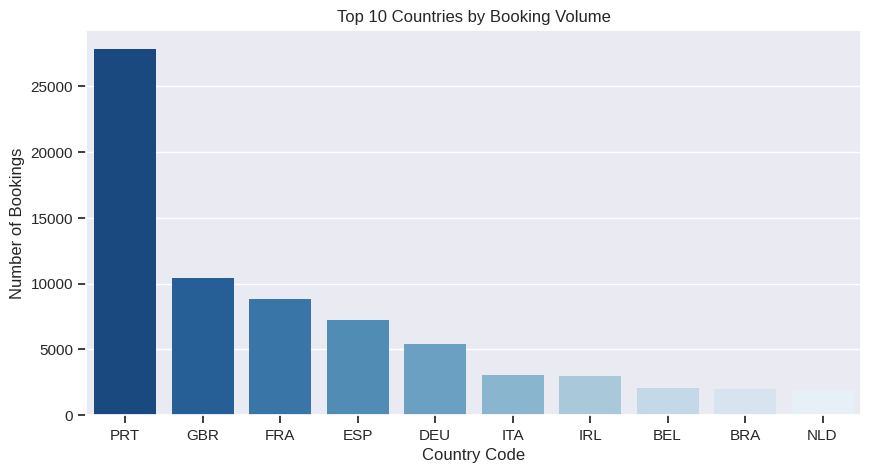

In [32]:
top_countries= df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_r')
plt.title('Top 10 Countries by Booking Volume')
plt.xlabel('Country Code')
plt.ylabel('Number of Bookings')
plt.show()


*The chart shows top 10 countries where most bookings come from.  
This can help hotel marketing teams focus on high-potential regions.

** #Which season sees the most cancellations?**

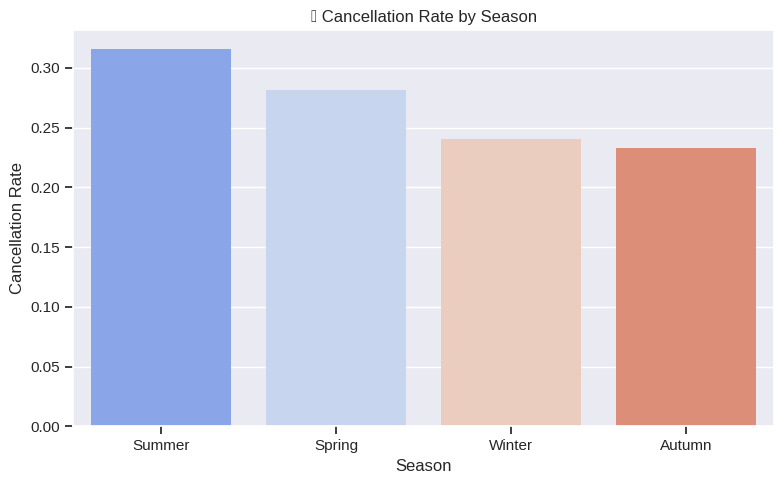

In [36]:

season_dict = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}                                                    # Map months to seasons
df['season'] = df['arrival_date_month'].map(season_dict)


season_cancel = df.groupby('season')['is_canceled'].mean().sort_values(ascending=False)  # Group by season and calculate cancellation rate


plt.figure(figsize=(8,5))         # Bar plot
sns.barplot(x=season_cancel.index, y=season_cancel.values, palette='coolwarm')
plt.title("Cancellation Rate by Season")
plt.ylabel("Cancellation Rate")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


**#Do longer stays lead to higher ADR (average daily rate)?**

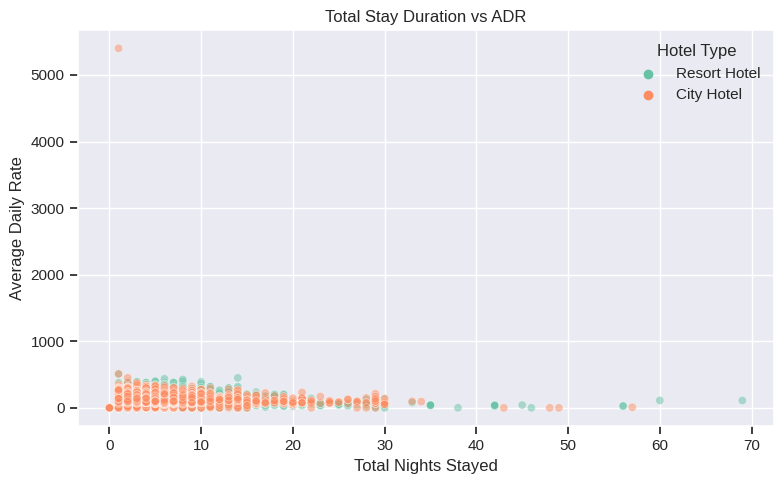

In [38]:

df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']  # Create total stay duration


plt.figure(figsize=(8,5))         # Scatter plot
sns.scatterplot(data=df, x='total_stay', y='adr', hue='hotel', alpha=0.5)
plt.title("Total Stay Duration vs ADR")
plt.xlabel("Total Nights Stayed")
plt.ylabel("Average Daily Rate")
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()


#**What type of hotel gets more families or solo guests?**

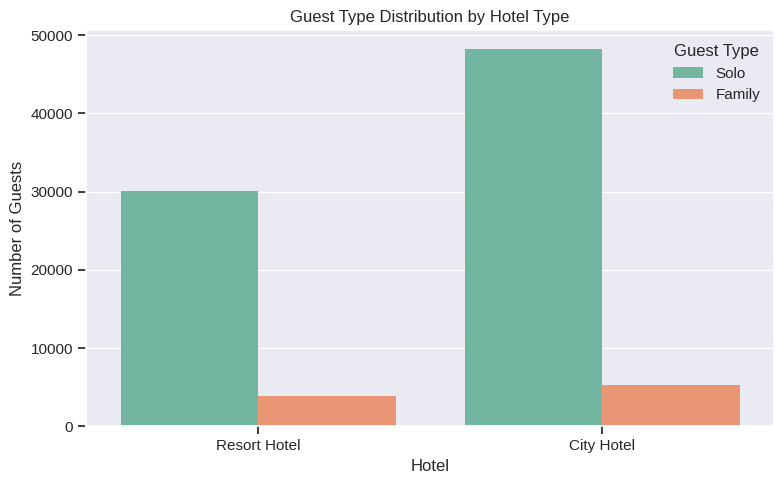

In [39]:
# Define guest type
df['guest_type'] = df.apply(lambda x: 'Family' if (x['children'] + x['babies']) > 0 else 'Solo', axis=1)

# Countplot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='hotel', hue='guest_type', palette='Set2')
plt.title("Guest Type Distribution by Hotel Type")
plt.xlabel("Hotel")
plt.ylabel("Number of Guests")
plt.legend(title='Guest Type')
plt.tight_layout()
plt.show()


**#Conclusion:**

This EDA uncovered patterns in guest booking behavior, cancellations, and pricing. Resort hotels are more prone to cancellations; families prefer longer stays, but longer stays do not equate to higher ADR.